This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Simple Plot

This notebook shows loading of a RADOLAN RW Composit.

First it reads the data and metadata and prints the metadata.

In [1]:
# import section
import wradlib as wrl
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as pl
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()

# load radolan files
rw_filename = 'radolan/misc/raa01-rw_10000-1408102050-dwd---bin.gz'
rw_filename = wrl.util.get_wradlib_data_file(rw_filename)
rwdata, rwattrs = wrl.io.read_radolan_composite(rw_filename)

# print the available attributes
print("RW Attributes:")
print("--------------")
for k, v in rwattrs.items():
    print(k, v)

RW Attributes:
--------------
producttype RW
datetime 2014-08-10 20:50:00
radarid 10000
datasize 1620000
maxrange 150 km
radolanversion 2.13.1
precision 0.1
intervalseconds 3600
nrow 900
ncol 900
radarlocations ['boo', 'ros', 'emd', 'hnr', 'umd', 'pro', 'ess', 'asd', 'neu', 'nhb', 'oft', 'tur', 'isn', 'fbg', 'mem']
nodataflag -9999
secondary [   799    800    801 ... 806263 806264 807163]
nodatamask [     0      1      2 ... 809997 809998 809999]
cluttermask []


Then it plots the data in the RADOLAN Stereographic Projection

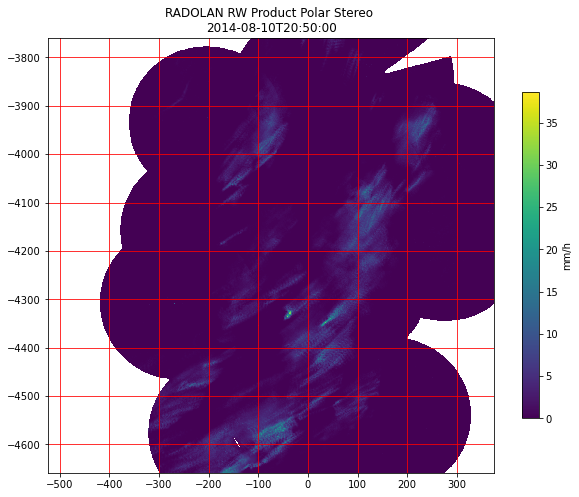

In [2]:
# mask invalid values
sec = rwattrs['secondary']
rwdata.flat[sec] = -9999
rwdata = np.ma.masked_equal(rwdata, -9999)

# get coordinates
radolan_grid_xy = wrl.georef.get_radolan_grid(900,900)
x = radolan_grid_xy[:,:,0]
y = radolan_grid_xy[:,:,1]

# create quick plot with colorbar and title
pl.figure(figsize=(10,8))
pl.pcolormesh(x, y, rwdata, cmap="viridis")
cb = pl.colorbar(shrink=0.75)
cb.set_label("mm/h")
pl.figaspect(1)
pl.title('RADOLAN RW Product Polar Stereo \n' + rwattrs['datetime'].isoformat())
pl.grid(color='r')